<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv(r"datos\df_merged.csv", index_col = 0)

#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\2405480060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "type", data = df, width = 0.5, palette = "coolwarm")


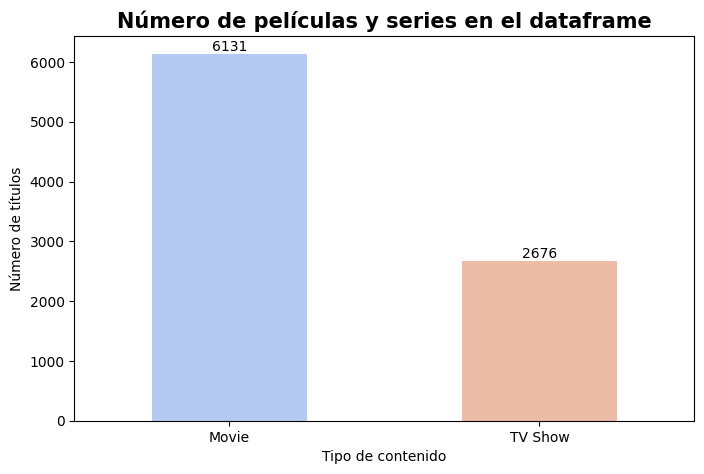

In [25]:
plt.figure(figsize=(8,5))
plt.title("Número de películas y series en el dataframe", fontsize = 15, fontweight = "bold")
ax = sns.countplot(x = "type", data = df, width = 0.5, palette = "coolwarm")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel("Tipo de contenido")
plt.ylabel("Número de títulos")
plt.show()

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del eje Y. 

- Ponerle título a la gráfica. 



In [26]:
df.drop(df[df["rating"].str.contains("min", case = False, na = False)].index, inplace=True)

C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\384541100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  clasi_plot = sns.countplot(x = "rating", data = df, palette = "viridis", order = df["rating"].value_counts().index)


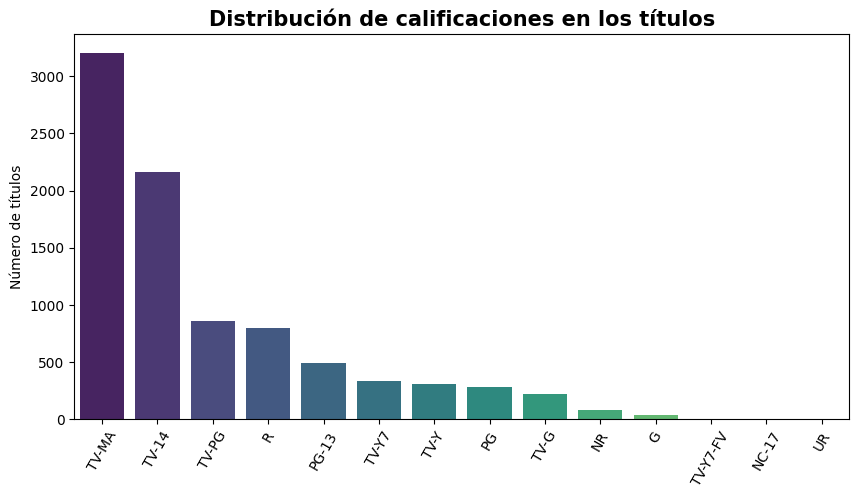

In [27]:
plt.figure(figsize=(10,5))
plt.title("Distribución de calificaciones en los títulos", fontsize = 15, fontweight = "bold")
clasi_plot = sns.countplot(x = "rating", data = df, palette = "viridis", order = df["rating"].value_counts().index)
plt.xlabel("")
plt.xticks(rotation = 60)
plt.ylabel("Número de títulos")
plt.show()

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\2667879334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_top10, x = "country", y = "count", palette="rocket")


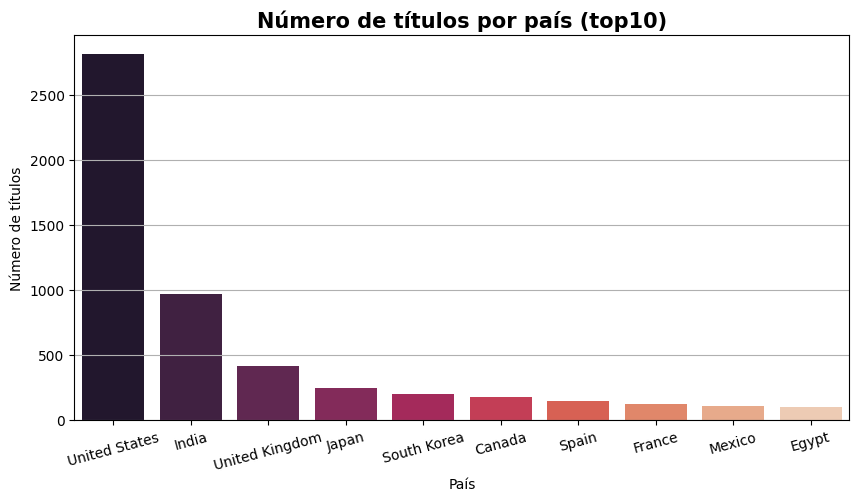

In [28]:
df_top10 = pd.DataFrame(df["country"].value_counts()).head(10)
plt.figure(figsize=(10,5))
plt.grid(True)
sns.barplot(data = df_top10, x = "country", y = "count", palette="rocket")
plt.xlabel("País")
plt.ylabel("Número de títulos")
plt.xticks(rotation = 15)
plt.title("Número de títulos por país (top10)", fontsize = 15, fontweight = "bold")
plt.show()

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

In [29]:
df_score_rating = df.groupby("rating")["IMDB Score"].mean().reset_index().sort_values(by="IMDB Score",
                                                                                       ascending = False).dropna()
df_score_rating.head(2)

,rating,IMDB Score
3,PG,6.80
10,TV-Y,6.78


C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\1234915140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_score_rating, x = "rating", y = "IMDB Score", palette = "viridis", width = 0.7)


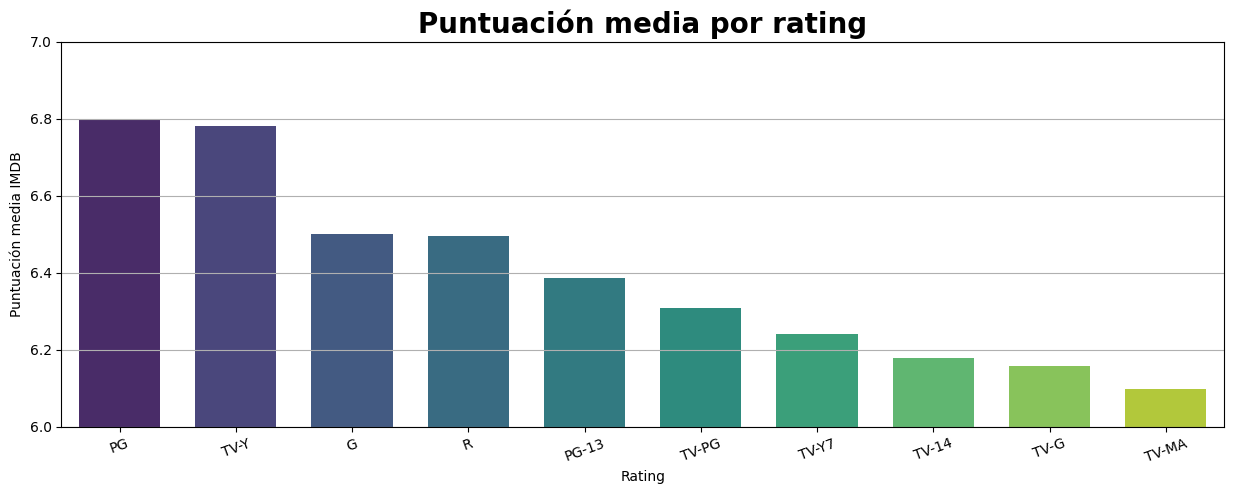

In [30]:
plt.figure(figsize=(15,5))

plt.title("Puntuación media por rating", fontsize = 20, fontweight = "bold")

plt.grid(True)
sns.barplot(data = df_score_rating, x = "rating", y = "IMDB Score", palette = "viridis", width = 0.7)
plt.xlabel("Rating")
plt.ylabel("Puntuación media IMDB")
plt.ylim([6,7])
plt.xticks(rotation = 20)
plt.show()

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


In [31]:
filtro_pelis = df["type"] == "Movie"
df_movies = df[filtro_pelis]

# def str_int(dataframe):
#     try:
#         map(int, dataframe)
#     except

df_movies["duration"] = df_movies["duration"].str.replace(pat = " min", repl = "", case = False)

C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\2413111485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration"] = df_movies["duration"].str.replace(pat = " min", repl = "", case = False)


In [32]:
df_movies["duration"] = list(map(float, df_movies["duration"]))

C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\3269530266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration"] = list(map(float, df_movies["duration"]))


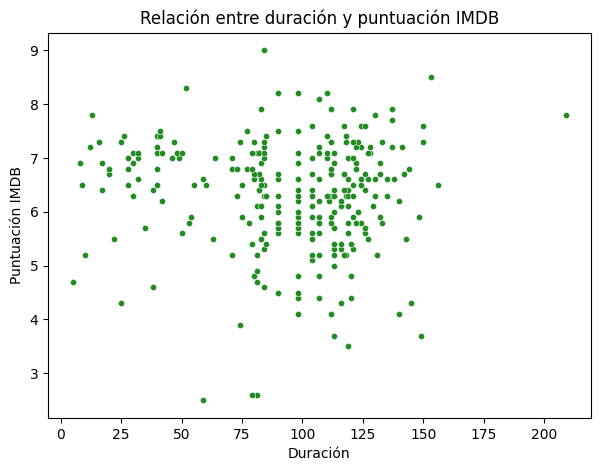

In [33]:
plt.figure(figsize=(7,5))
plt.title("Relación entre duración y puntuación IMDB")
sns.scatterplot(data = df_movies, x = "duration", y = "IMDB Score", s = 20, color = "forestgreen")
plt.xlabel("Duración")
plt.ylabel("Puntuación IMDB")
plt.show()

#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [34]:
idiomas10 = df["Language"].value_counts().head(10).keys()
df_top10lang = df[df["Language"].isin(idiomas10)]

C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\2234942987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_top10lang, x = "Language", y = "IMDB Score", order = idiomas10, palette = "icefire")


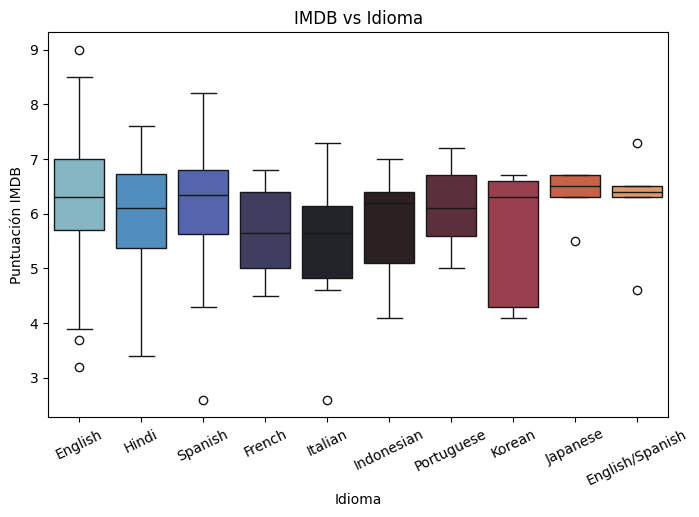

In [35]:
plt.figure(figsize = (8,5))
plt.title("IMDB vs Idioma")
sns.boxplot(data = df_top10lang, x = "Language", y = "IMDB Score", order = idiomas10, palette = "icefire")
plt.xticks(rotation = 26)
plt.xlabel("Idioma")
plt.ylabel("Puntuación IMDB")
plt.show()

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



In [36]:
df_directors = df.sort_values(by = "IMDB Score", ascending=False)[["IMDB Score", "director"]]
df_directors10 = df_directors[df_directors["director"].notna()].head(10)

In [37]:
df_directors10

,IMDB Score,director
512,9.0,"Alastair Fothergill, Jonnie Hughes, Keith Scholey"
511,8.5,Thom Zimny
510,8.4,Evgeny Afineevsky
509,8.3,Huw Cordey
508,8.3,Jon Alpert
507,8.2,Carlos Pérez Osorio
506,8.2,Ali Tabrizi
505,8.2,Sergio Pablos
503,8.1,"Pippa Ehrlich, James Reed"
502,8.1,Jeff Orlowski


C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\1786545415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_directors10, y = "director", x = "IMDB Score", palette = "pastel")


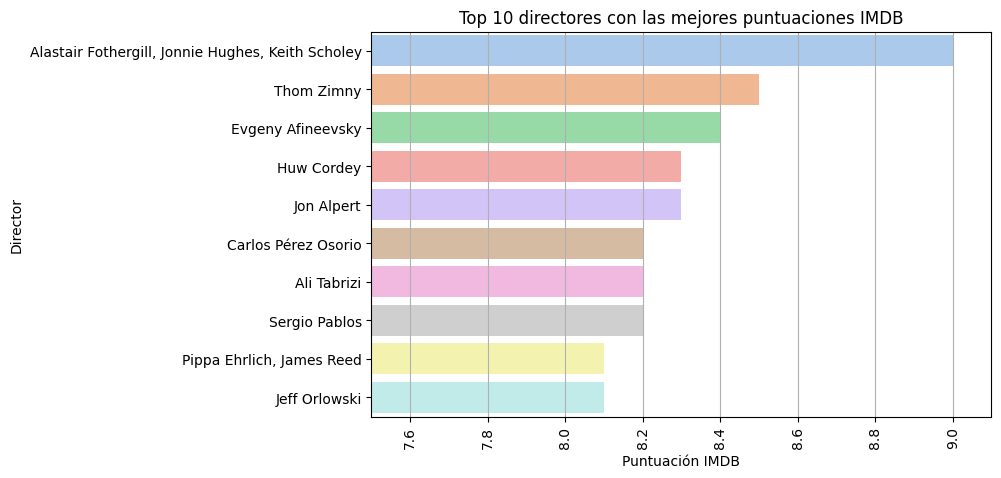

In [61]:
plt.figure(figsize=(8,5))
plt.title("Top 10 directores con las mejores puntuaciones IMDB")
plt.grid(True)
sns.barplot(data = df_directors10, y = "director", x = "IMDB Score", palette = "pastel")
plt.xlim(7.5,9.1)
plt.xticks(rotation = 90)
plt.ylabel("Director")
plt.xlabel("Puntuación IMDB")
plt.show()


#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\4171781659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "type", data = df, width = 0.5, palette = "coolwarm", ax = axes[0])
C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\4171781659.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "rating", data = df, palette = "viridis", ax = axes[1], order = df["rating"].value_counts().index)


<Figure size 1000x500 with 0 Axes>

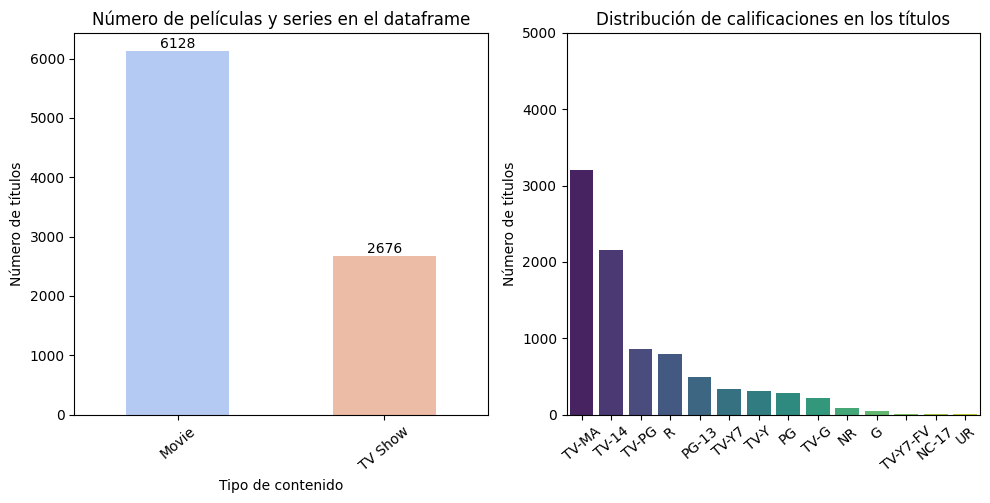

In [39]:
plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1,2, figsize = (10,5))
ax = sns.countplot(x = "type", data = df, width = 0.5, palette = "coolwarm", ax = axes[0])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])




sns.countplot(x = "rating", data = df, palette = "viridis", ax = axes[1], order = df["rating"].value_counts().index)

plt.xticks(rotation = 60)

plt.tight_layout()

axes[0].set_xlabel("Tipo de contenido")
axes[0].set_ylabel("Número de títulos")
axes[0].tick_params(axis = "x", labelrotation = 40)

axes[1].set_xlabel("")
axes[1].set_ylabel("Número de títulos")
axes[1].tick_params(axis = "x", labelrotation = 40)
axes[1].set_ylim(top = 5000)

axes[0].set_title("Número de películas y series en el dataframe")
axes[1].set_title("Distribución de calificaciones en los títulos")
plt.show()

#### Ejercicio 10: ¿Cómo se distribuyen los títulos por país para los 6 principales países? Tienes que crear una gráfica para cada país mostrando los resultados en un subplot. Deberás: 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



In [40]:
df_top6 = pd.DataFrame(df["country"].value_counts()).head(6)
df_top6

,count
country,
United States,2815
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181


C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\733141389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df[cond], x = "type", ax = axes.flat[i], palette = "mako") ## Usando flat nos ahorramos tener que hacer 2 loops, llamando al elemento del array de axes después de aplanarlo.
C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\733141389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df[cond], x = "type", ax = axes.flat[i], palette = "mako") ## Usando flat nos ahorramos tener que hacer 2 loops, llamando al elemento del array de axes después de aplanarlo.
C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\733141389.py:4: FutureWarning: 

Passing `palette` without

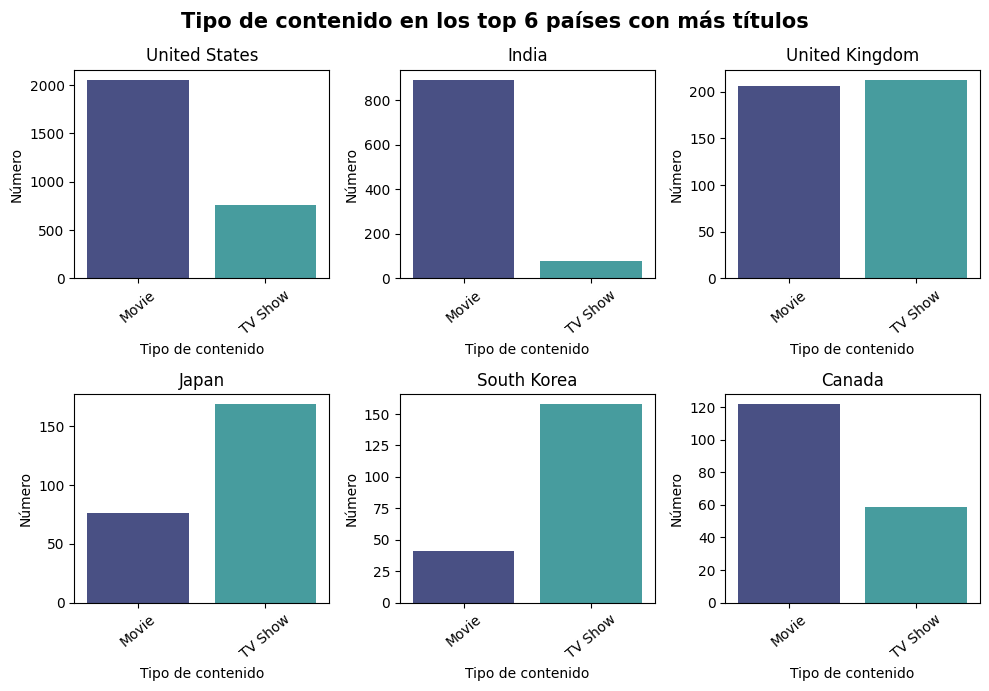

In [41]:
fig, axes = plt.subplots(2, 3, figsize = (10,7))
for i in range(6):
    cond = df["country"] == df_top6.reset_index()["country"].values[i]
    sns.countplot(data = df[cond], x = "type", ax = axes.flat[i], palette = "mako") ## Usando flat nos ahorramos tener que hacer 2 loops, llamando al elemento del array de axes después de aplanarlo.
    axes.flat[i].set_title(df_top6.reset_index()["country"].values[i])
    axes.flat[i].tick_params(axis = "x", labelrotation = 40)
    axes.flat[i].set_xlabel("Tipo de contenido")
    axes.flat[i].set_ylabel("Número")

fig.suptitle("Tipo de contenido en los top 6 países con más títulos", fontsize = 15, fontweight = "bold")
plt.tight_layout()

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

C:\Users\yanru\AppData\Local\Temp\ipykernel_28776\2447393522.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = countries5, y = rating5_count, palette="RdYlGn")


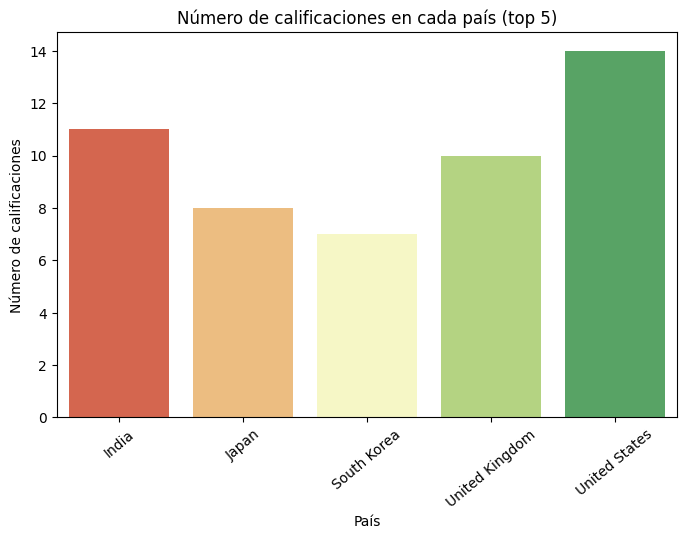

In [42]:
df_top5 = pd.DataFrame(df["country"].value_counts()).head(5).reset_index()
df_top5_rows = df[df["country"].isin(df_top5["country"].values)]

countries5 = df_top5_rows.groupby("country")["rating"].unique().keys()
rating5_count = df_top5_rows.groupby("country")["rating"].nunique()

plt.figure(figsize=(8,5))
sns.barplot(x = countries5, y = rating5_count, palette="RdYlGn")
plt.xlabel("País")
plt.ylabel("Número de calificaciones")
plt.xticks(rotation = 40)
plt.title("Número de calificaciones en cada país (top 5)")
plt.show()

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los últimos 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

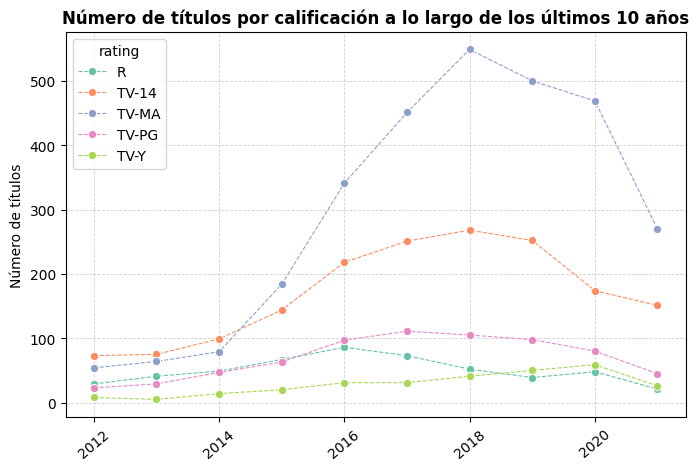

In [43]:
last_year = df["release_year"].max()
df_last10 = df[df["release_year"].between(last_year-9, last_year)]

df_last10_rating5 = df_last10.groupby("rating")["title"].count().reset_index().sort_values(by="title", ascending=False).head(5)
ratings5 = df_last10_rating5["rating"].values


df_last10_rat5 = df_last10[df_last10["rating"].isin(ratings5)]

df_12 = df_last10_rat5.groupby(["rating", "release_year"])["title"].count().reset_index()

plt.figure(figsize=(8,5))
plt.grid(ls = "--", lw = 0.6, alpha = 0.6)
sns.lineplot(x = "release_year", y = "title", hue = "rating", data = df_12, 
             linewidth = 0.8, linestyle = "--", marker = "o", palette = "Set2" )
plt.xlabel("")
plt.ylabel("Número de títulos")
plt.xticks(rotation = 40)
plt.title("Número de títulos por calificación a lo largo de los últimos 10 años", fontsize = 12, fontweight = "bold")
plt.show()


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

In [44]:
df["date_added"] = df["date_added"].str.strip()
df["year_added"] = pd.to_datetime(df["date_added"]).dt.year

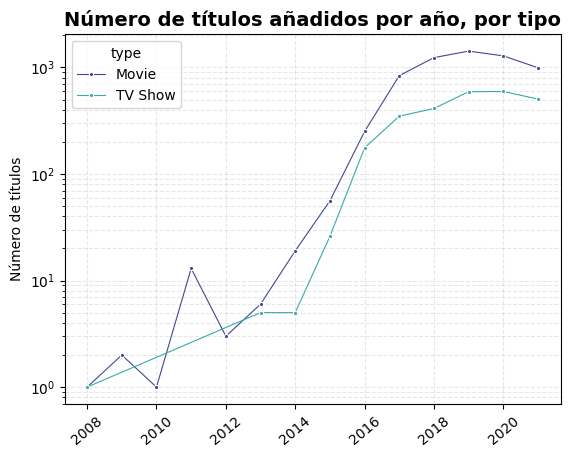

In [45]:
# hue = "type"

df_13 = df.groupby(["year_added", "type"])["title"].count().reset_index()
plt.title("Número de títulos añadidos por año, por tipo", fontsize = 14, fontweight = "bold")
plt.grid(ls = "--", which = "both", alpha = 0.3)
sns.lineplot(data = df_13, x = "year_added", y = "title", hue = "type",
             ls = "-", lw = 0.8, marker = ".", palette = "mako")
plt.ylabel("Número de títulos")
plt.xlabel("")
plt.xticks(rotation = 40)
plt.yscale("log") # En escala logarítmica vemos mejor los valores pequeños que se encuentran en los primeros años
plt.show()

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

In [46]:
labels_rat = df.groupby(["rating"])["title"].count().reset_index()["rating"].values
values_rat = df.groupby(["rating"])["title"].count().reset_index()["title"].values

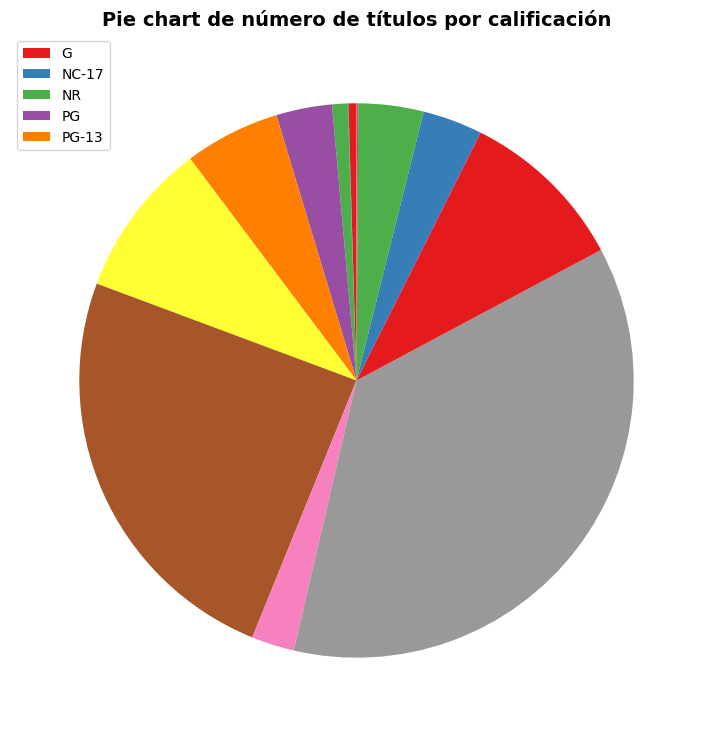

In [47]:
plt.figure(figsize=(10,9))
patches, texts = plt.pie(x = values_rat, startangle=90, colors=sns.color_palette('Set1'))
plt.legend(patches, labels_rat[:5], loc="upper left")
plt.title("Pie chart de número de títulos por calificación", fontsize = 14, fontweight = "bold")
plt.show()

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.

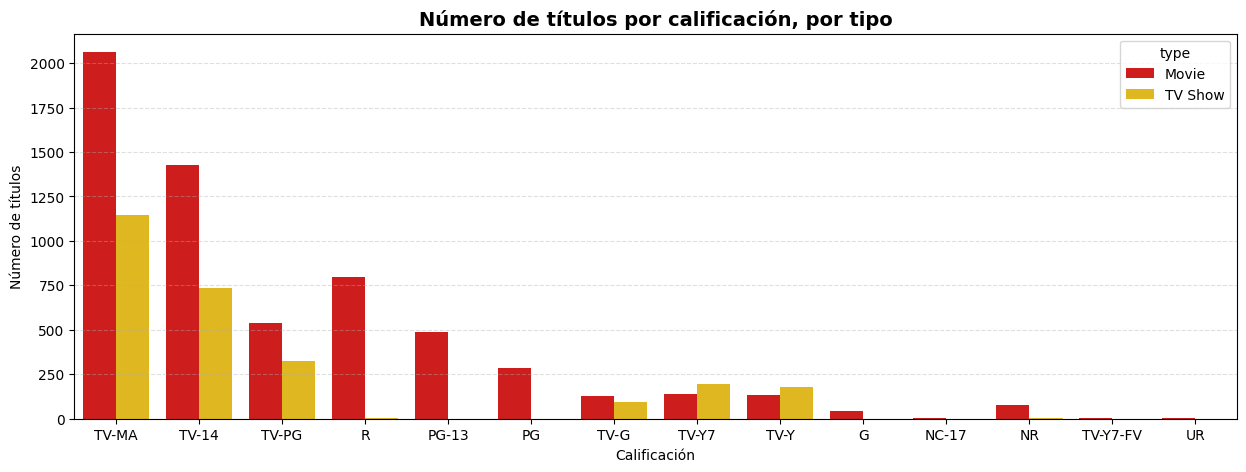

In [48]:
plt.figure(figsize = (15,5))
plt.grid(True, ls = "--", alpha = 0.4)
sns.countplot(data=df, x="rating", hue = "type", palette = "hot")
plt.title("Número de títulos por calificación, por tipo", fontsize = 14, fontweight = "bold")
plt.xlabel("Calificación")
plt.ylabel("Número de títulos")
plt.show()